9/9/2020
# Update Figures for Simulation
We focus on homophily-only setting where the only-signal is label-dependent one -- i.e. we assume the only structure is a ``homophily-dependent'' one and compare across-layer vs. across-network.

In [1]:
import sys
print(sys.version)
from __future__ import division
import os
#import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
# relevant python libraries
execfile('python_libraries.py')
# oSBM code
from sklearn.model_selection import RandomizedSearchCV


execfile('create_oSBM_class_specific_alternative.py')
execfile('LINK_revised.py')
execfile('compute_homophily.py')

2.7.15 |Anaconda, Inc.| (default, Oct 23 2018, 13:35:16) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Amherst-Analog

## Within-Network

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


In [3]:
#1000/1000, homophily = 1.1, average degree = 84
xall = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_train_Amherst_analog_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
print(df_train.head())
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)

y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Amherst_analog_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
from sklearn.linear_model import LogisticRegressionCV

C_vals = [10**x for x in range(-10,100)]
modelall = linear_model.LogisticRegressionCV(
                    Cs = C_vals,
                    penalty='l2',
                    solver='lbfgs',
                    cv = 5, max_iter = 5000)



   keys
0  1462
1  1461
2  1460
3  1459
4  1458


In [4]:
num_iter = 25

In [5]:
## ReFeX, within-network
(mean_accuracy_xall, se_accuracy_xall, 
     mean_micro_auc_xall,se_micro_auc_xall, mean_wt_auc_xall_lbfgs,se_wt_auc_xall)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(yall.gender_y), ## gender labels 
                                                                  np.matrix(xall), ## adjacency matrix
                                                                  clf = modelall,
                                                                num_iter=num_iter)


0.9


/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [6]:
## LINK, within-network
edges = pd.read_csv('../../data/SBM_ICWSM_revise/train_Amherst_analog_SBM_by_degree_within_nw.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)



1  0     1     2     3     4     5     6     7     8     9     ...   1990  \
0                                                              ...          
0     0     0     0     0     0     0     0     0     0     0  ...      0   
1     0     0     0     0     0     0     0     0     0     0  ...      0   
2     0     0     0     0     0     0     0     0     0     0  ...      0   
3     0     0     0     0     0     0     0     0     0     0  ...      0   
4     0     0     0     0     0     0     0     0     0     0  ...      0   

1  1991  1992  1993  1994  1995  1996  1997  1998  1999  
0                                                        
0     0     0     0     0     0     0     0     0     0  
1     0     1     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     1  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2000 columns]


In [7]:
(mean_accuracy_LINK_RM, se_accuracy_LINK_RM, 
     mean_micro_auc_LINK_RM,se_micro_auc_LINK_RM, mean_wt_LINK_RM,se_wt_LINK_RM)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                        np.array(y_train_y.gender_y), ## gender labels 
                                        np.matrix(df), ## adjacency matrix
                                        clf = modelall, 
                                        num_iter=num_iter, 
                                        cv_setup = None)


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


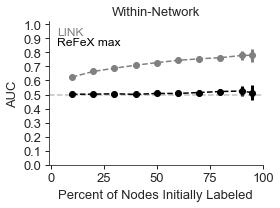

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(4,3)) # 4,3

plt.setp(ax1, xticks=[0,25,50,75,100])

ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_xall_lbfgs,
    yerr=se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, mean_wt_LINK_RM,
    yerr=se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')

ax1.annotate('ReFeX max', xy=(3, 0.85), 
        color='black', alpha=1, size=12)
ax1.annotate('LINK', xy=(3, 0.92), 
         color='gray', alpha=1, size=12)


ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.02,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
#plt.title('$\lambda$=1.1',fontsize=13)
plt.title('Within-Network',fontsize=13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_Amherst_analog_within_nw_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [13]:
amherst_within = pd.DataFrame({'percent_labeled': percent_initially_labelled,
                                'ReFeX_max_mean': mean_wt_auc_xall_lbfgs,
                               'ReFeX_max_std': se_wt_auc_xall,
                              'LINK_mean': mean_wt_LINK_RM,
                              'LINK_std':se_wt_LINK_RM})

In [14]:
amherst_within.head()

,LINK_mean,LINK_std,ReFeX_max_mean,ReFeX_max_std,percent_labeled
0,0.623847,0.013192,0.502573,0.013462,0.1
1,0.664072,0.010764,0.502534,0.008012,0.2
2,0.687141,0.011415,0.505963,0.011122,0.3
3,0.708748,0.010843,0.501200,0.012885,0.4
4,0.726793,0.013893,0.508081,0.012482,0.5


In [15]:
amherst_within.to_csv('AmherstWithinSimulation.csv')

## Across-Layer

In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()

xall = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_train_Amherst_analog_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)

y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Amherst_analog_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

In [17]:
C_vals = [10**x for x in range(-10,100)]
model = linear_model.LogisticRegressionCV(
                                           Cs = C_vals,
                                           penalty='l2',
                                            solver='lbfgs',
                                           cv = 5, max_iter = 1000)


In [18]:
np.shape(xall)

(2000, 87)

In [19]:
#xall = np.random.rand(np.shape(xall)[0], np.shape(xall)[1])
model.fit(xall,
    yall.gender_y)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
## LINK 
y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Amherst_analog_SBM_by_degree_within_nw_gender.csv')
edges = pd.read_csv('../../data/SBM_ICWSM_revise/train_Amherst_analog_SBM_by_degree_within_nw.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)



In [21]:
clf = linear_model.LogisticRegressionCV(
                           Cs = C_vals,
                           penalty='l2',
                            solver='lbfgs',
                           cv = 5, max_iter = 1000)


In [22]:
clf.fit(np.matrix(df), np.array(y_train_y.gender_y))

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
refex_auc_pr = []
quant_75_refex = []
quant_25_refex = []
mean_refex = []

mean_link = []
std_dev_link = []
for lambda_num in np.array(['1.1', '1.2', '1.3', '1.4', '1.5']):
    refex_auc_x_layer1 = []
    link_auc_x_layer = []
    for num in range(10):
            ### REFEX
            x_test = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_'+str(num)+'_Amherst_analog_SBM_across_layer_'+lambda_num+'.csv-featureValues.csv', 
                                              header = -1)


            df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
            x_test = x_test.loc[:,1::] #drop IDs column

            scaler.fit(x_test) #transform each feature on [0,1]-scale
            x_test = scaler.transform(x_test)

            y_test_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Amherst_analog_SBM_across_layer_'+lambda_num+'_gender.csv')
            y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
                    how = 'left',
                    on = 'keys')

            y_predict_refex = model.predict_proba(x_test)[:,1]
            print('ReFeX',metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
                                                           y_predict_refex)
            auc_output = auc(np.array(recall), np.array(precision))
            print(auc_output)
            refex_auc_pr.append(auc_output)
            aucresult = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted')

            refex_auc_x_layer1.append(aucresult)

            ### LINK
            y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Amherst_analog_SBM_across_layer_'+lambda_num+'_gender.csv')

            edges = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Amherst_analog_SBM_across_layer_'+lambda_num+'.csv', header = -1)
            edges.head()
            df = pd.crosstab(edges[0], edges[1])
            #print df.head()
            idx = df.columns.union(df.index)
            df = df.reindex(index = idx, columns=idx, fill_value=0)
            y_predict = clf.predict_proba(np.matrix(df))[:,1]

            print('LINK',metrics.roc_auc_score(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)),
                                                    y_predict,average='weighted'))
            link_auc_x_layer.append(metrics.roc_auc_score(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)),
                                                    y_predict,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)), 
                                                           y_predict)
            auc_output = auc(recall, precision)
            #print(auc_output)



            print('')
    mean_refex.append(np.mean(refex_auc_x_layer1))
    quant_25_refex.append(np.sqrt(np.var(refex_auc_x_layer1)))
    
    mean_link.append(np.mean(link_auc_x_layer))
    std_dev_link.append(np.sqrt(np.var(link_auc_x_layer)))

('ReFeX', 0.5221815000000001)
0.5168181500265352
('LINK', 0.815344)

('ReFeX', 0.491486)
0.504569383023446
('LINK', 0.813661)

('ReFeX', 0.4875155)
0.4978650856202085
('LINK', 0.8011799999999999)

('ReFeX', 0.5078885)
0.515310781910371
('LINK', 0.828174)

('ReFeX', 0.513228)
0.5199489942196711
('LINK', 0.816402)

('ReFeX', 0.5302775)
0.5176915197183685
('LINK', 0.7992620000000001)

('ReFeX', 0.530176)
0.5271069962494019
('LINK', 0.817863)

('ReFeX', 0.49522849999999996)
0.48830181601035494
('LINK', 0.8183799999999999)

('ReFeX', 0.4775035)
0.4835527792532115
('LINK', 0.792741)

('ReFeX', 0.5095685)
0.4980350110788351
('LINK', 0.774853)

('ReFeX', 0.5138265)
0.5157634241899393
('LINK', 0.9590909999999999)

('ReFeX', 0.5667505)
0.5701237130219915
('LINK', 0.9513739999999999)

('ReFeX', 0.485784)
0.4967379252374945
('LINK', 0.951468)

('ReFeX', 0.49182149999999997)
0.49240956181594725
('LINK', 0.9511630000000001)

('ReFeX', 0.504607)
0.5036044723992823
('LINK', 0.9551830000000001)

('ReFe

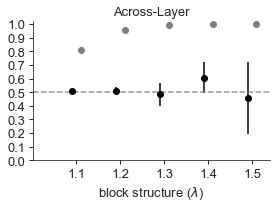

In [24]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
plt.setp(ax1, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05

ax1.errorbar(np.array(range(len(mean_refex)))/2-0.05, 
            mean_refex,
            yerr = quant_25_refex, 
            fmt='o', color = 'black')


ax1.errorbar(np.array(range(len(mean_link)))/2+0.05,mean_link, color = 'gray', #alpha = 0.5,
             yerr = std_dev_link, fmt = 'o')#,


mean_link

#ax1.set_ylabel('AUC', size = 13)

ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


#ax1.annotate('ReFeX max', xy=(3, 0.85), 
#        color='black', alpha=1, size=12)
#ax1.annotate('LINK', xy=(3, 0.92), 
#         color='gray', alpha=1, size=12)

plt.title('Across-Layer', size = 13) 
## relabel x-axis
plt.xlim(-0.5,2.2)

plt.xlabel('block structure ($\lambda$)', size = 13)
plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_Amherst_analog_across_layer_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [25]:
amherst_layer = pd.DataFrame({'block': np.array(['1.1', '1.2', '1.3', '1.4', '1.5']),
                            'ReFeX_max_mean': mean_refex,
                            'ReFeX_max_std': quant_25_refex,
                            'LINK_mean': mean_link,
                            'LINK_std':std_dev_link})

In [27]:
amherst_layer.to_csv('AmherstAcrosLayer.csv')

## Across-Network

In [28]:
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
refex_auc_pr = []
quant_75_refex = []
quant_25_refex = []
mean_refex = []

mean_link = []
std_dev_link = []
for lambda_num in np.array(['1.1', '1.2', '1.3', '1.4', '1.5']):
    refex_auc_x_layer1 = []
    link_auc_x_layer = []
    for num in range(10):
            ### REFEX
            x_test = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_'+str(num)+'_Amherst_analog_SBM_across_network_'+lambda_num+'.csv-featureValues.csv', 
                                              header = -1)


            df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
            x_test = x_test.loc[:,1::] #drop IDs column
            
            scaler.fit(x_test) #transform each feature on [0,1]-scale
            x_test = scaler.transform(x_test)

            y_test_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Amherst_analog_SBM_across_network_'+lambda_num+'_gender.csv')
            print(np.mean(y_test_y.gender_y==1))
            y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
                    how = 'left',
                    on = 'keys')

            y_predict_refex = model.predict_proba(x_test)[:,1]
            print('ReFeX',metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
                                                           y_predict_refex)
            auc_output = auc(np.array(recall), np.array(precision))
            print(auc_output)
            refex_auc_pr.append(auc_output)
            aucresult = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted')

            refex_auc_x_layer1.append(aucresult)



            print('')
    mean_refex.append(np.mean(refex_auc_x_layer1))
    quant_25_refex.append(np.sqrt(np.var(refex_auc_x_layer1)))
    #quant_75_refex.append(np.quantile(refex_auc_x_layer1, 0.95))
    
    mean_link.append(np.mean(link_auc_x_layer))
    std_dev_link.append(np.sqrt(np.var(link_auc_x_layer)))

0.75
('ReFeX', 0.6096906666666666)
0.8479589836146688

0.75
('ReFeX', 0.5977399999999999)
0.8350143579263185

0.75
('ReFeX', 0.4526366666666667)
0.7600486347780584

0.75
('ReFeX', 0.4655066666666666)
0.7802592864847266

0.75
('ReFeX', 0.5791033333333333)
0.83386936162355

0.75
('ReFeX', 0.5105653333333333)
0.7851125630614701

0.75
('ReFeX', 0.38354599999999994)
0.709340367171178

0.75
('ReFeX', 0.4990706666666667)
0.7892527031240911

0.75
('ReFeX', 0.4499006666666666)
0.7549458791905129

0.75
('ReFeX', 0.5293233333333334)
0.7915696479352858

0.75
('ReFeX', 0.4542273333333333)


/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.7885237451557797

0.75
('ReFeX', 0.5280846666666666)
0.8243902716068114

0.75
('ReFeX', 0.5008173333333333)
0.7983104507696094

0.75
('ReFeX', 0.5259933333333334)
0.8026729217241837

0.75
('ReFeX', 0.35658333333333325)
0.7397121217923246

0.75
('ReFeX', 0.5321626666666667)
0.8159724630140168

0.75
('ReFeX', 0.37088933333333335)
0.7516240694688727

0.75
('ReFeX', 0.5733373333333333)
0.8525142136863106

0.75
('ReFeX', 0.34662600000000005)
0.7317290650756363

0.75
('ReFeX', 0.6183693333333333)
0.8609841378198877

0.75
('ReFeX', 0.5158546666666666)
0.832727798501838

0.75
('ReFeX', 0.4839593333333333)
0.820745755207697

0.75
('ReFeX', 0.6100953333333333)
0.8468883227422658

0.75
('ReFeX', 0.5111313333333333)
0.8287163993571125

0.75
('ReFeX', 0.45592066666666675)
0.793428032597039

0.75
('ReFeX', 0.5511739999999999)
0.8473062247679335

0.75
('ReFeX', 0.48655933333333334)
0.8227747777422303

0.75
('ReFeX', 0.5920059999999999)
0.8594004028049989

0.75
('ReFeX', 0.5809686666666667)
0.855855

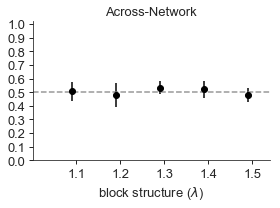

In [29]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
plt.setp(ax1, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05

ax1.errorbar(np.array(range(len(mean_refex)))/2-0.05, 
            mean_refex,
            yerr = quant_25_refex, 
            fmt='o', color = 'black')


ax1.errorbar(np.array(range(len(mean_link)))/2+0.05,mean_link, color = 'gray', #alpha = 0.5,
             yerr = std_dev_link, fmt = 'o')#,


mean_link

#ax1.set_ylabel('AUC', size = 13)

ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


#ax1.annotate('ReFeX max', xy=(3, 0.85), 
#        color='black', alpha=1, size=12)
#ax1.annotate('LINK', xy=(3, 0.92), 
#         color='gray', alpha=1, size=12)

plt.title('Across-Network', size = 13) 
## relabel x-axis
plt.xlim(-0.5,2.2)

plt.xlabel('block structure ($\lambda$)', size = 13)
plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_Amherst_analog_across_nw_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [30]:
amherst_network = pd.DataFrame({'block': np.array(['1.1', '1.2', '1.3', '1.4', '1.5']),
                            'ReFeX_max_mean': mean_refex,
                            'ReFeX_max_std': quant_25_refex,
                            })

In [31]:
amherst_network.head()

,ReFeX_max_mean,ReFeX_max_std,block
0,0.507708,0.069083,1.1
1,0.480709,0.090014,1.2
2,0.531650,0.048302,1.3
3,0.520212,0.062059,1.4
4,0.480541,0.049850,1.5


In [32]:
amherst_network.to_csv('AmherstAcrossNetwork.csv')

# Sloan-Analog

In [33]:
#1000/1000, homophily = 1.1, average degree = 84
xall = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_train_Sloan_analog_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
print(df_train.head())
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)

y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Sloan_analog_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
from sklearn.linear_model import LogisticRegressionCV


C_vals = [10**x for x in range(-10,100)]
modelall = linear_model.LogisticRegressionCV(
                                           Cs = C_vals,
                                           # Cs = 20,
                                           penalty='l2',
                                            solver='lbfgs',
                                           cv = 5, max_iter = 1000)


   keys
0  1462
1  1461
2  1460
3  1459
4  1458


In [34]:
(mean_accuracy_xall, se_accuracy_xall, 
     mean_micro_auc_xall,se_micro_auc_xall, mean_wt_auc_xall_lbfgs,se_wt_auc_xall)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(yall.gender_y), ## gender labels 
                                                                  np.matrix(xall), ## adjacency matrix
                                                                  clf = modelall,
                                                                num_iter=num_iter)


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [37]:
## LINK, within-network
edges = pd.read_csv('../../data/SBM_ICWSM_revise/train_Sloan_analog_SBM_by_degree_within_nw.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)



1  0     1     2     3     4     5     6     7     8     9     ...   1990  \
0                                                              ...          
0     0     0     0     0     0     0     0     0     0     0  ...      0   
1     0     0     0     0     0     0     0     0     0     0  ...      0   
2     0     0     0     1     0     0     0     0     0     0  ...      0   
3     0     0     1     0     0     0     0     0     0     0  ...      0   
4     0     0     0     0     0     0     0     0     0     0  ...      0   

1  1991  1992  1993  1994  1995  1996  1997  1998  1999  
0                                                        
0     0     0     0     1     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     1     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2000 columns]


In [38]:
(mean_accuracy_LINK_RM, se_accuracy_LINK_RM, 
     mean_micro_auc_LINK_RM,se_micro_auc_LINK_RM, mean_wt_LINK_RM,se_wt_LINK_RM)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y_train_y.gender_y), ## gender labels 
                                                                  np.matrix(df), ## adjacency matrix
                                                clf = modelall,num_iter=num_iter, 
                                                                cv_setup = None)


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


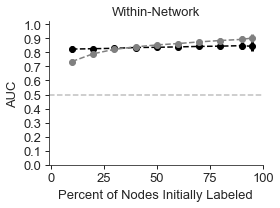

In [39]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(4,3)) # 4,3

plt.setp(ax1, xticks=[0,25,50,75,100])

ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_xall_lbfgs,
    yerr=se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, mean_wt_LINK_RM,
    yerr=se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')



ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.02,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
#plt.title('$\lambda$=1.1',fontsize=13)
plt.title('Within-Network',fontsize=13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_SLOAN_analog_within_nw_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [40]:
slaon_within = pd.DataFrame({'percent_labeled': percent_initially_labelled,
                                'ReFeX_max_mean': mean_wt_auc_xall_lbfgs,
                               'ReFeX_max_std': se_wt_auc_xall,
                              'LINK_mean': mean_wt_LINK_RM,
                              'LINK_std':se_wt_LINK_RM})

In [41]:
slaon_within.to_csv("slaon_within.csv")

In [42]:
#slaon_within

## Across-Layer

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()

xall = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_train_Sloan_analog_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)
y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Sloan_analog_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

In [44]:
C_vals = [10**x for x in range(-10,100)]
model = linear_model.LogisticRegressionCV(
                                           Cs = C_vals,
                                           penalty='l2',
                                            solver='lbfgs',
                                           cv = 5, max_iter = 1000)


In [45]:
model.fit(xall,
    yall.gender_y)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [46]:
## LINK 
y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/train_Sloan_analog_SBM_by_degree_within_nw_gender.csv')
edges = pd.read_csv('../../data/SBM_ICWSM_revise/train_Sloan_analog_SBM_by_degree_within_nw.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
#print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)

clf = linear_model.LogisticRegressionCV(
                                           Cs = C_vals,
                                           penalty='l2',
                                            solver='lbfgs',
                                           cv = 5, max_iter = 1000)

clf.fit(np.matrix(df), np.array(y_train_y.gender_y))

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [47]:
## TESTING ONLY!!!
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler = MaxAbsScaler()
#scaler = MinMaxScaler()
from sklearn.metrics import precision_recall_curve
refex_auc_pr = []
quant_75_refex = []
quant_25_refex = []
mean_refex = []

mean_link = []
std_dev_link = []
for lambda_num in np.array(['1.1', '1.2', '1.3', '1.4', '1.5']):
    refex_auc_x_layer1 = []
    link_auc_x_layer = []
    for num in range(10):
            ### REFEX
            x_test = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_'+str(num)+'_Sloan_analog_SBM_across_layer_'+lambda_num+'.csv-featureValues.csv', 
                                              header = -1)


            df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
            x_test = x_test.loc[:,1::] #drop IDs column

            scaler.fit(x_test) #transform each feature on [0,1]-scale
            x_test = scaler.transform(x_test)

            y_test_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Sloan_analog_SBM_across_layer_'+lambda_num+'_gender.csv')
            y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
                    how = 'left',
                    on = 'keys')

            y_predict_refex = model.predict_proba(x_test)[:,1]
            print('ReFeX',metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
                                                           y_predict_refex)
            auc_output = auc(np.array(recall), np.array(precision))
            print(auc_output)
            refex_auc_pr.append(auc_output)
            aucresult = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted')

            refex_auc_x_layer1.append(aucresult)

            ### LINK
            y_train_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Sloan_analog_SBM_across_layer_'+lambda_num+'_gender.csv')

            edges = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Sloan_analog_SBM_across_layer_'+lambda_num+'.csv', header = -1)
            edges.head()
            df = pd.crosstab(edges[0], edges[1])
            #print df.head()
            idx = df.columns.union(df.index)
            df = df.reindex(index = idx, columns=idx, fill_value=0)
            y_predict = clf.predict_proba(np.matrix(df))[:,1]

            print('LINK',metrics.roc_auc_score(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)),
                                                    y_predict,average='weighted'))
            link_auc_x_layer.append(metrics.roc_auc_score(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)),
                                                    y_predict,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_train_y.gender_y,np.unique(y_train_y.gender_y)), 
                                                           y_predict)
            auc_output = auc(recall, precision)
            #print(auc_output)



            print('')
    mean_refex.append(np.mean(refex_auc_x_layer1))
    quant_25_refex.append(np.sqrt(np.var(refex_auc_x_layer1)))
    #quant_75_refex.append(np.quantile(refex_auc_x_layer1, 0.95))
    
    mean_link.append(np.mean(link_auc_x_layer))
    std_dev_link.append(np.sqrt(np.var(link_auc_x_layer)))

('ReFeX', 0.8266739999999999)
0.9354570082054889
('LINK', 0.8730986666666666)

('ReFeX', 0.8285)
0.9360126360026613
('LINK', 0.8794133333333334)

('ReFeX', 0.8291100000000001)
0.9354369433099485
('LINK', 0.8680986666666666)

('ReFeX', 0.8277533333333333)
0.9359214972069665
('LINK', 0.875532)

('ReFeX', 0.8280946666666666)
0.9331110272064587
('LINK', 0.8509866666666667)

('ReFeX', 0.83614)
0.9423981446042219
('LINK', 0.9005226666666666)

('ReFeX', 0.805848)
0.9254562103083341
('LINK', 0.8786146666666667)

('ReFeX', 0.7998753333333334)
0.92722329792984
('LINK', 0.8754173333333333)

('ReFeX', 0.826738)
0.9375350552114272
('LINK', 0.87156)

('ReFeX', 0.7954460000000001)
0.9236349900763248
('LINK', 0.8907026666666666)

('ReFeX', 0.9271893333333334)
0.9794613758034078
('LINK', 0.9950866666666667)

('ReFeX', 0.9153826666666667)
0.9760879620738627
('LINK', 0.9926386666666667)

('ReFeX', 0.9110366666666665)
0.9755008910540507
('LINK', 0.9943693333333333)

('ReFeX', 0.9115480000000001)
0.9737103

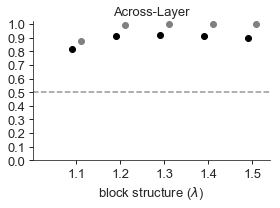

In [48]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
plt.setp(ax1, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05

ax1.errorbar(np.array(range(len(mean_refex)))/2-0.05, 
            mean_refex,
            yerr = quant_25_refex, 
            fmt='o', color = 'black')


ax1.errorbar(np.array(range(len(mean_link)))/2+0.05,mean_link, color = 'gray', #alpha = 0.5,
             yerr = std_dev_link, fmt = 'o')#,


mean_link

#ax1.set_ylabel('AUC', size = 13)

ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


#ax1.annotate('ReFeX max', xy=(3, 0.85), 
#        color='black', alpha=1, size=12)
#ax1.annotate('LINK', xy=(3, 0.92), 
#         color='gray', alpha=1, size=12)

plt.title('Across-Layer', size = 13) 
## relabel x-axis
plt.xlim(-0.5,2.2)

plt.xlabel('block structure ($\lambda$)', size = 13)
plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_Sloan_analog_across_layer_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [49]:
mean_refex

[0.8204179333333332,
 0.9153039333333334,
 0.9180153333333333,
 0.9136957333333333,
 0.9004293333333333]

In [50]:
sloan_layer = pd.DataFrame({'block': np.array(['1.1', '1.2', '1.3', '1.4', '1.5']),
                            'ReFeX_max_mean': mean_refex,
                            'ReFeX_max_std': quant_25_refex,
                            'LINK_mean': mean_link,
                            'LINK_std':std_dev_link})

In [51]:
sloan_layer.head()

,LINK_mean,LINK_std,ReFeX_max_mean,ReFeX_max_std,block
0,0.876395,1.245491e-02,0.820418,0.013556,1.1
1,0.992712,1.430519e-03,0.915304,0.014871,1.2
2,0.999927,2.875923e-05,0.918015,0.004987,1.3
3,1.000000,4.000000e-07,0.913696,0.007476,1.4
4,1.000000,0.000000e+00,0.900429,0.014272,1.5


## Across-Network

In [52]:
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
refex_auc_pr = []
quant_75_refex = []
quant_25_refex = []
mean_refex = []
mean_link = []
std_dev_link = []
for lambda_num in np.array(['1.1', '1.2', '1.3', '1.4', '1.5']):
    refex_auc_x_layer1 = []
    link_auc_x_layer = []
    for num in range(10):
            ### REFEX
            x_test = pd.read_csv('../../code/refex-rolx-master/SBM_ICWSM_revise/out_union_0.5SBM_'+str(num)+'_Sloan_analog_SBM_across_network_'+lambda_num+'.csv-featureValues.csv', 
                                              header = -1)


            df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
            x_test = x_test.loc[:,1::] #drop IDs column

            scaler.fit(x_test) #transform each feature on [0,1]-scale
            x_test = scaler.transform(x_test)

            y_test_y = pd.read_csv('../../data/SBM_ICWSM_revise/'+str(num)+'_Sloan_analog_SBM_across_network_'+lambda_num+'_gender.csv')
            y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
                    how = 'left',
                    on = 'keys')

            y_predict_refex = model.predict_proba(x_test)[:,1]
            print('ReFeX',metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted'))
            precision, recall, thresholds = precision_recall_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
                                                           y_predict_refex)
            auc_output = auc(np.array(recall), np.array(precision))
            print(auc_output)
            refex_auc_pr.append(auc_output)
            aucresult = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                    y_predict_refex,average='weighted')

            refex_auc_x_layer1.append(aucresult)



            print('')
    mean_refex.append(np.mean(refex_auc_x_layer1))
    quant_25_refex.append(np.sqrt(np.var(refex_auc_x_layer1)))    
    mean_link.append(np.mean(link_auc_x_layer))
    std_dev_link.append(np.sqrt(np.var(link_auc_x_layer)))

('ReFeX', 0.6146067708333334)
0.7025063749240414

('ReFeX', 0.6441666666666667)
0.7313779536451936

('ReFeX', 0.6198291666666667)
0.7088255749758281

('ReFeX', 0.6367307291666666)
0.7119228848795618

('ReFeX', 0.662103125)
0.7410635718650775

('ReFeX', 0.6166713541666666)
0.6920313816080721

('ReFeX', 0.6318208333333334)
0.712822370955053

('ReFeX', 0.6237833333333334)
0.7089622971851126

('ReFeX', 0.6391520833333333)
0.7239922287766012

('ReFeX', 0.6405260416666667)
0.7099813862398106

('ReFeX', 0.7798427083333332)
0.8497072879902561

('ReFeX', 0.8126307291666667)
0.8588459263472531

('ReFeX', 0.7772666666666668)
0.8488822035087731

('ReFeX', 0.8282171875)
0.8813534476867987

('ReFeX', 0.7800036458333333)
0.8563579933482791

('ReFeX', 0.8194687500000001)
0.866605136974115

('ReFeX', 0.8224239583333334)
0.8772231426784173

('ReFeX', 0.8236348958333333)
0.883557854140405

('ReFeX', 0.7826375)
0.8456432829838553

('ReFeX', 0.818465625)
0.8687188477670209

('ReFeX', 0.9103635416666667)
0.

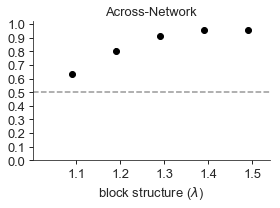

In [53]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
plt.setp(ax1, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05

ax1.errorbar(np.array(range(len(mean_refex)))/2-0.05, 
            mean_refex,
            yerr = quant_25_refex, 
            fmt='o', color = 'black')


ax1.errorbar(np.array(range(len(mean_link)))/2+0.05,mean_link, color = 'gray', #alpha = 0.5,
             yerr = std_dev_link, fmt = 'o')#,


mean_link

#ax1.set_ylabel('AUC', size = 13)

ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


#ax1.annotate('ReFeX max', xy=(3, 0.85), 
#        color='black', alpha=1, size=12)
#ax1.annotate('LINK', xy=(3, 0.92), 
#         color='gray', alpha=1, size=12)

plt.title('Across-Network', size = 13) 
## relabel x-axis
plt.xlim(-0.5,2.2)

plt.xlabel('block structure ($\lambda$)', size = 13)
plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
#pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_Sloan_analog_across_nw_AUC_final.pdf')
#pp.savefig()
#pp.close()

In [54]:
sloan_network = pd.DataFrame({'block': np.array(['1.1', '1.2', '1.3', '1.4', '1.5']),
                            'ReFeX_max_mean': mean_refex,
                            'ReFeX_max_std': quant_25_refex,
                            })

## Format Figures
2x3

In [55]:
amherst_within.head()

,LINK_mean,LINK_std,ReFeX_max_mean,ReFeX_max_std,percent_labeled
0,0.623847,0.013192,0.502573,0.013462,0.1
1,0.664072,0.010764,0.502534,0.008012,0.2
2,0.687141,0.011415,0.505963,0.011122,0.3
3,0.708748,0.010843,0.501200,0.012885,0.4
4,0.726793,0.013893,0.508081,0.012482,0.5


In [56]:
amherst_layer.columns

Index([u'LINK_mean', u'LINK_std', u'ReFeX_max_mean', u'ReFeX_max_std',
       u'block'],
      dtype='object')

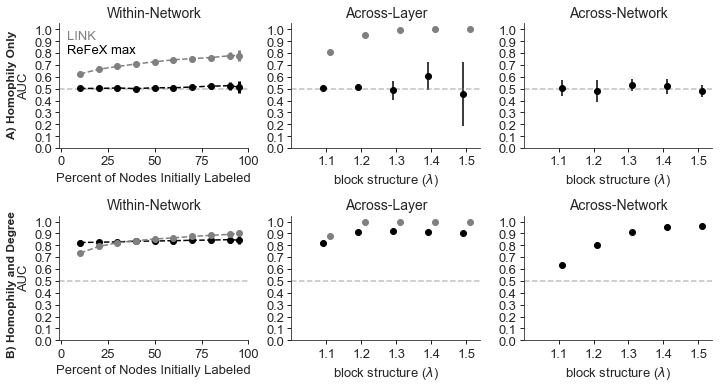

In [103]:
%matplotlib inline
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, 
                             sharey=False, sharex=False,
                            figsize=(10, 5.5))
#plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75,1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
#ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
#ax1.minorticks_on()
ax1.tick_params('both', 
                length=4, 
                width=1, which='major', left=3, bottom=1, top=0, right=0)

plt.setp(ax1, xticks=[0,25,50,75,100])
ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax1.errorbar(amherst_within.percent_labeled*100, amherst_within.ReFeX_max_mean,
    yerr=amherst_within.ReFeX_max_std, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(amherst_within.percent_labeled*100, amherst_within.LINK_mean,
    yerr=amherst_within.LINK_std, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')

ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax1.set_ylim(0,1.05)
ax1.set_yticks(np.arange(0,1.02,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
ax1.set_title('Within-Network',fontsize=14)
ax1.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)



alpha_empirical = 0.4
plt.setp(ax2, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
w = 0.75
width = 0.05

ax2.errorbar(np.array(range(len(amherst_layer.ReFeX_max_mean)))/2-0.05, 
            amherst_layer.ReFeX_max_mean,
            yerr = amherst_layer.ReFeX_max_std, 
            fmt='o', color = 'black')


ax2.errorbar(np.array(range(len(amherst_layer.LINK_mean)))/2+0.05,amherst_layer.LINK_mean, color = 'gray', #alpha = 0.5,
             yerr = amherst_layer.LINK_std, fmt = 'o')#,

ax2.set_ylim(0,1.05)
ax2.set_yticks(np.arange(0,1.1,0.1))
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_title('Across-Layer', size = 14) 
ax2.set_xlim(-0.5,2.2)

ax2.set_xlabel('block structure ($\lambda$)', size = 13)
ax2.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)




plt.setp(ax3, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax3.minorticks_on()
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
ax3.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05


ax3.errorbar(np.array(range(len(amherst_network.ReFeX_max_mean)))/2+0.05,amherst_network.ReFeX_max_mean, 
             color = 'black', #alpha = 0.5,
             yerr = amherst_network.ReFeX_max_std, fmt = 'o')#,


#ax1.set_ylabel('AUC', size = 13)

ax3.set_ylim(0,1.05)
ax3.set_yticks(np.arange(0,1.1,0.1))
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)


ax3.set_title('Across-Network', size = 14) 
ax3.set_xlim(-0.5,2.2)

ax3.set_xlabel('block structure ($\lambda$)', size = 13)



ax4.tick_params('both', 
                length=4, 
                width=1, which='major', left=1, bottom=1, top=0, right=0)

plt.setp(ax4, xticks=[0,25,50,75,100])
ax4.set_xticks([0,25,50,75,100])
ax4.minorticks_on()
ax4.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax4.errorbar(slaon_within.percent_labeled*100, slaon_within.ReFeX_max_mean,
    yerr=slaon_within.ReFeX_max_std, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax4.errorbar(slaon_within.percent_labeled*100, slaon_within.LINK_mean,
    yerr=slaon_within.LINK_std, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')

ax4.set_ylabel('AUC', size=13)
ax4.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax4.set_ylim(0,1.05)
ax4.set_yticks(np.arange(0,1.02,0.1))
ax4.spines["right"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.set_xlim(-1,100)
ax4.set_title('Within-Network', size = 14) 
ax4.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


alpha_empirical = 0.4
plt.setp(ax5, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax5.minorticks_on()
ax5.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
w = 0.75
width = 0.05

ax5.errorbar(np.array(range(len(sloan_layer.ReFeX_max_mean)))/2-0.05, 
            sloan_layer.ReFeX_max_mean,
            yerr = sloan_layer.ReFeX_max_std, 
            fmt='o', color = 'black')


ax5.errorbar(np.array(range(len(sloan_layer.LINK_mean)))/2+0.05,sloan_layer.LINK_mean, color = 'gray', #alpha = 0.5,
             yerr = sloan_layer.LINK_std, fmt = 'o')#,

ax5.set_ylim(0,1.05)
ax5.set_yticks(np.arange(0,1.1,0.1))
ax5.spines["right"].set_visible(False)
ax5.spines["top"].set_visible(False)
ax5.set_title('Across-Layer', size = 14) 
ax5.set_xlim(-0.5,2.2)

ax5.set_xlabel('block structure ($\lambda$)', size = 13)
ax5.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)



plt.setp(ax6, xticks=[ 0. ,  0.5, 1.0 ,1.5, 2.0],
         xticklabels= np.array(['1.1', '1.2', '1.3', '1.4', '1.5']))

ax6.minorticks_on()
ax6.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,
               labelsize = 13)
ax6.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.75
width = 0.05


ax6.errorbar(np.array(range(len(sloan_network.ReFeX_max_mean)))/2+0.05,sloan_network.ReFeX_max_mean, color = 'black', #alpha = 0.5,
             yerr = sloan_network.ReFeX_max_std, fmt = 'o')#,
ax6.set_ylim(0,1.05)
ax6.set_yticks(np.arange(0,1.1,0.1))
ax6.spines["right"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.set_title('Across-Network', size = 14) 
ax6.set_xlim(-0.5,2.2)
ax6.set_xlabel('block structure ($\lambda$)', size = 13)


ax1.annotate('ReFeX max', xy=(3, 0.8), 
        color='black', alpha=1, size=13)
ax1.annotate('LINK', xy=(3, 0.92), 
         color='gray', alpha=1, size=13)


ax1.text(-0.25,0.88, "A) Homophily Only", size=12, ha="center", 
         transform=ax1.transAxes, rotation = 90, weight = 'bold')

ax4.text(-0.25,0.98, "B) Homophily and Degree", size=12, ha="center", 
         transform=ax4.transAxes, rotation = 90, weight = 'bold')

f.tight_layout(h_pad=1, w_pad = 0.25)
#f.tight_layout()
pp = PdfPages('../../figs/ICWSM_Revise2020/SBM_simulation_final.pdf')
pp.savefig()
pp.close()
